# Exploratory Data Analysis (EDA)
Let's visualize some sample images from the dataset to understand the data better.

# Dataset Introduction
The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset. The provided files are:

* train.7z - a folder containing the training images in png format
* test.7z - a folder containing the test
* images in png format


trainLabels.csv - the training labels
To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

######The label classes in the dataset are:

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
Link for Dataset

# Import Libraries

## 1. Setting up the Environment and Importing Libraries

Before we begin, we need to import the necessary Python libraries. These libraries provide the tools for data handling, building and training neural networks, visualization, and evaluating model performance. We also include some basic system configurations.

In [ ]:
# Import fundamental libraries for numerical operations and data handling
import numpy as np
import pandas as pd

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules from Keras for building and managing neural network models
from keras.models import Sequential
from keras.models import load_model # Although not used for loading here, it's a relevant function
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization # Various layer types
from keras.optimizers import Adam # Optimization algorithm

# Import the CIFAR-10 dataset directly from Keras
from keras.datasets import cifar10

# Import utility for one-hot encoding the labels
from tensorflow.keras.utils import to_categorical

# Import time module for potential timing (though not used in the final code)
import time

# Import EarlyStopping callback to prevent overfitting during training
from keras.callbacks import EarlyStopping

# Import tools for evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix

# Import the os module for interacting with the operating system
import os
# Configure environment variable to avoid potential issues with OpenMP
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Example of listing files in an input directory (often used in competitive programming environments)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import TensorFlow as tf
import tensorflow as tf

# Configure TensorFlow to list available physical devices (e.g., GPUs)
tf.config.list_physical_devices("GPU")

# Import warnings module to manage warning messages
import warnings
# Filter out simple warnings for a cleaner output
warnings.simplefilter('ignore')

## 2. Loading the CIFAR-10 Dataset

The CIFAR-10 dataset is a built-in dataset in Keras, making it easy to load directly. The dataset is automatically split into training and testing sets.
- The training set (`x_train`, `y_train`) is used to train the model.
- The testing set (`x_test`, `y_test`) is used to evaluate the model's performance on unseen data.

In [ ]:
# Load the CIFAR-10 dataset from Keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Examining Dataset Shapes

It's crucial to understand the dimensions of the loaded data.
- `x_train` and `x_test` are arrays of image data, where each element is a 32x32 pixel color image (3 channels for RGB). The shape is (number of images, height, width, channels).
- `y_train` and `y_test` are arrays of labels, where each element is a single integer representing the class of the corresponding image. The shape is (number of images, 1).

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [ ]:
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
x_train[123].min(), x_train[123].max()

(np.uint8(1), np.uint8(243))

# Plotting Sample

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

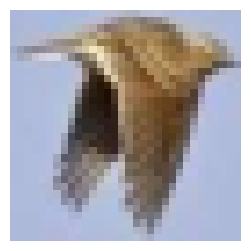

In [ ]:
plt.figure(figsize=(4,3))
plt.imshow(x_train[123], cmap='gray')
plt.axis('off')

In [ ]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [ ]:
classes[y_train[123][0]]

'bird'

## 3. Exploratory Data Analysis (EDA)

Visualizing some sample images helps us get a feel for the data and the types of images present in the dataset. We will display a grid of the first 25 images from the training set along with their corresponding class labels.

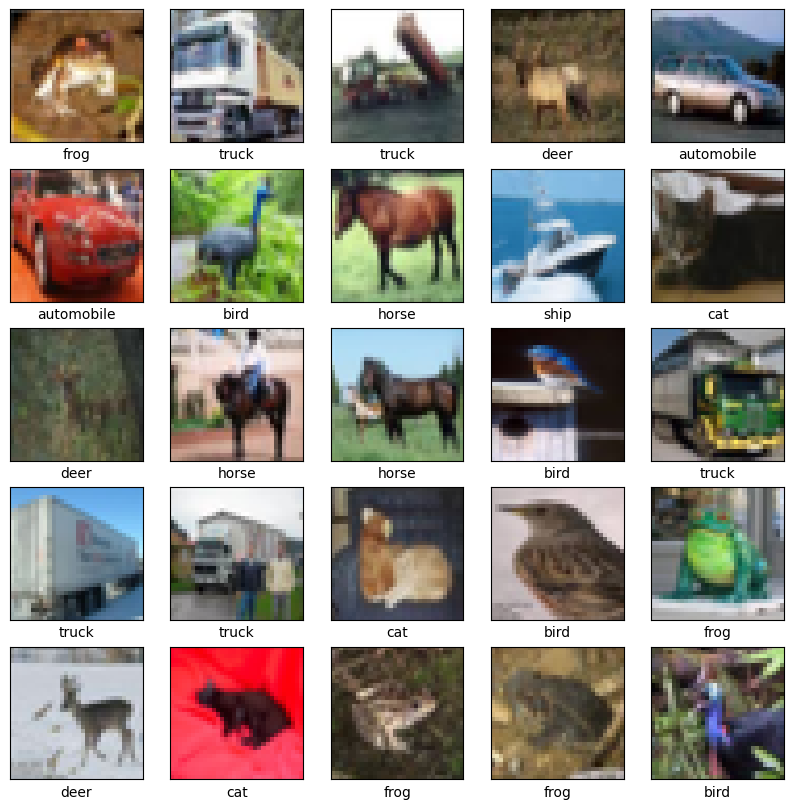

In [ ]:
# Define a list of the 10 class names in the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure to display the images
plt.figure(figsize=(10,10))

# Loop through the first 25 images in the training set
for i in range(25):
    # Create a subplot for each image in a 5x5 grid
    plt.subplot(5,5,i+1)
    # Turn off the axis ticks for cleaner visualization
    plt.xticks([])
    plt.yticks([])
    # Turn off the grid lines
    plt.grid(False)
    # Display the image
    plt.imshow(x_train[i])
    # Add the class label as the x-axis label. y_train is a 2D array, so we access the label using [i][0].
    plt.xlabel(class_names[y_train[i][0]])

# Display the plot with all the subplots
plt.show()

## 4. Data Preprocessing

Preprocessing is a crucial step before feeding image data into a neural network. We perform the following transformations:
- **Normalization:** Scaling pixel values to a range between 0 and 1. This helps optimize the training process.
- **One-Hot Encoding:** Converting the integer class labels into a binary vector format. This is required for the categorical crossentropy loss function used in multi-class classification.

In [ ]:
# Convert the data type of the image arrays to float32 and normalize the pixel values by dividing by 255.0
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train[123].min(), x_train[123].max()

(np.float32(0.003921569), np.float32(0.9529412))

# Changing Dtype of Target Feature to Categorical

In [ ]:
# Convert the integer class labels into one-hot encoded vectors
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Print the shapes of the arrays after preprocessing to show the changes
print(f"x_train shape after normalization: {x_train.shape}")
print(f"x_test shape after normalization: {x_test.shape}")
print(f"y_train shape after one-hot encoding: {y_train_one_hot.shape}")
print(f"y_test shape after one-hot encoding: {y_test_one_hot.shape}")

x_train shape after normalization: (50000, 32, 32, 3)
x_test shape after normalization: (10000, 32, 32, 3)
y_train shape after one-hot encoding: (50000, 10)
y_test shape after one-hot encoding: (10000, 10)


In [ ]:
y_train_one_hot[123]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

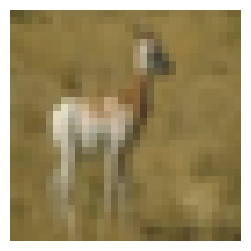

In [ ]:
plt.figure(figsize=(4,3))
plt.imshow(x_train[123], cmap='PuRd_r')
plt.imshow(x_train[58])
plt.axis('off')
plt.show()

# plt.figure(figsize=(4,3))
# plt.imshow(x_train[58])
# plt.axis('off')
# plt.show()

# Build the CNN Model
Now, let's build a Convolutional Neural Network model for image classification. We will use a sequential model with convolutional, pooling, dropout, and dense layers.

## 5. Building and Training CNN Models

We will build and train three different CNN models to compare their performance on the CIFAR-10 dataset. Each model will have a different architecture or include different layers to observe their impact on classification accuracy.

In [ ]:
from tqdm import tqdm
# from keras_tqdm import TQDMCallback
from tqdm.keras import TqdmCallback

### 5.1 Model 1: A Basic CNN Architecture

This is our first CNN model. It's a sequential model, meaning layers are stacked one after another.
- **Convolutional Layers (`Conv2D`):** These layers apply filters to the input images to extract features. We use ReLU activation, a common choice for its computational efficiency. `padding='same'` adds padding to the input so that the output feature map has the same spatial dimensions as the input.
- **MaxPooling Layers (`MaxPool2D`):** These layers reduce the spatial dimensions (height and width) of the feature maps, which helps in reducing the number of parameters and computation, as well as making the model more robust to small variations in the input.
- **Flatten Layer:** Converts the 2D feature maps from the convolutional layers into a 1D vector to be fed into the dense layers.
- **Dense Layers:** These are fully connected layers. The first dense layer is a hidden layer with ReLU activation.
- **Dropout Layer:** Randomly sets a fraction of input units to 0 during training. This helps prevent overfitting by making the network less reliant on specific neurons.
- **Output Layer:** A dense layer with 10 units (one for each class) and a softmax activation function. Softmax outputs a probability distribution over the 10 classes, where the sum of probabilities is 1.
- **Compilation:** We compile the model by specifying the optimizer (Adam), the loss function (categorical crossentropy, suitable for multi-class classification with one-hot encoded labels), and the metrics to monitor during training (accuracy).

In [ ]:
# Define the first Sequential model
model = Sequential()

# Add the first Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Add the first Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Add the second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Add the second Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Add the third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add the first Dense (fully connected) Layer
model.add(Dense(units=64, activation='relu'))
# Add a Dropout layer
model.add(Dropout(0.5))

# Add the output Dense Layer with softmax activation
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Training Model 1

We train Model 1 using the `fit()` method.
- `x_train` and `y_train_one_hot`: The training data and corresponding one-hot encoded labels.
- `epochs`: The number of times the training algorithm will iterate over the entire training dataset.
- `batch_size`: The number of samples per gradient update.
- `validation_data`: Data to evaluate the loss and any metrics at the end of each epoch. We use the test data for validation.
- `callbacks`: Functions to be applied at certain stages of the training process. We use `EarlyStopping` to stop training if the validation loss starts increasing, indicating potential overfitting. `patience=5` means training will stop if validation loss doesn't improve for 5 consecutive epochs. `restore_best_weights=True` ensures that the model weights from the epoch with the best validation loss are restored.

In [ ]:
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=15, batch_size=32,
                    validation_data=(x_test, y_test_one_hot),
                    callbacks=[early_stopping])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2742 - loss: 1.9383 - val_accuracy: 0.5239 - val_loss: 1.3269
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4872 - loss: 1.4179 - val_accuracy: 0.5857 - val_loss: 1.1695
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5559 - loss: 1.2588 - val_accuracy: 0.6293 - val_loss: 1.0608
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5939 - loss: 1.1640 - val_accuracy: 0.6374 - val_loss: 1.0286
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6273 - loss: 1.0716 - val_accuracy: 0.6557 - val_loss: 1.0168
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6517 - loss: 1.0027 - val_accuracy: 0.6789 - val_loss: 0.9276
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6731 - loss: 0.9386 - val_accuracy: 0.6885 - val_loss: 0.9048
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6849 - loss: 0.904

#### Evaluating Model 1

After training, we evaluate Model 1 on the unseen test dataset to measure its performance. The `evaluate()` method returns the loss value and metrics values for the model in test mode.

In [ ]:
# Evaluate Model 1 on the test data
loss1, accuracy1 = model1.evaluate(x_test, y_test_one_hot, verbose=0)

# Print the test loss and accuracy
print(f"Test Loss for Model 1: {loss1:.4f}")
print(f"Test Accuracy for Model 1: {accuracy1:.4f}")

Test Loss for Model 1: 0.8606
Test Accuracy for Model 1: 0.7180


# Plotting Metrics of the Model

In [ ]:
model.metrics_names

['loss', 'compile_metrics']

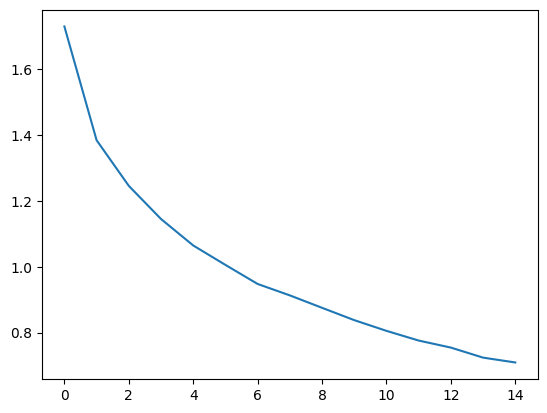

In [ ]:
loss = model.history.history['loss']
plt.plot(loss)
plt.show();

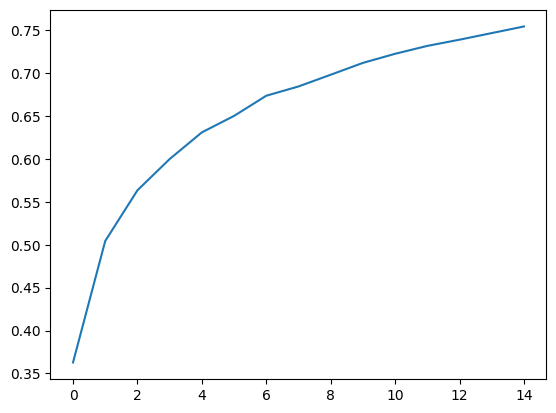

In [ ]:
acc = model.history.history['accuracy']
plt.plot(acc)
plt.show();

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## 6. Visualizing Model Training Performance

Plotting the training and validation loss and accuracy curves for each model helps us visualize their learning progress and identify potential issues like overfitting.

### 6.1 Model 1 Training Metrics

These plots show how the loss and accuracy of Model 1 changed during training for both the training and validation datasets.

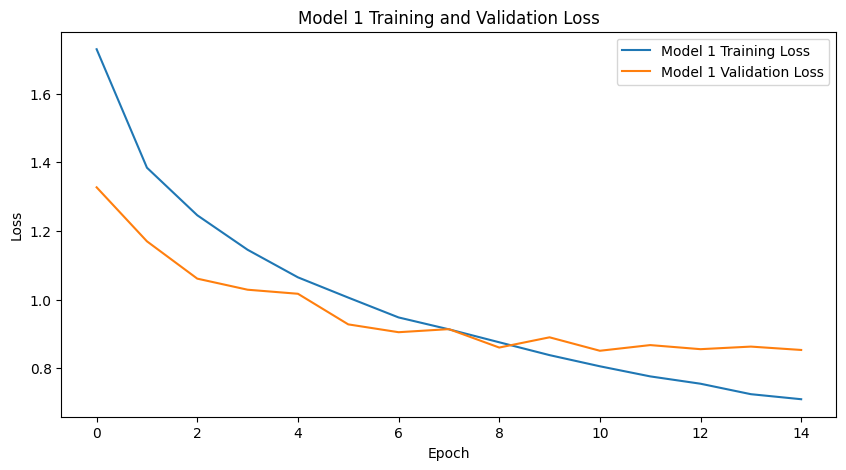

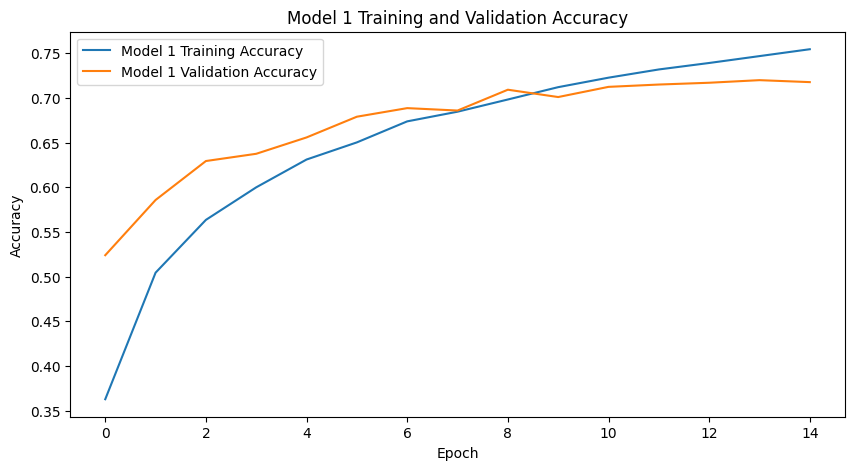

In [ ]:
# Plot training and validation loss for Model 1
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Model 1 Training Loss')
plt.plot(history.history['val_loss'], label='Model 1 Validation Loss')
plt.title('Model 1 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy for Model 1
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.title('Model 1 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation of the Model

In [ ]:
ev1 = model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {ev1[0]:.4f}")
print(f"Test Accuracy: {ev1[1]:.4f}")

Test Loss: 0.8507
Test Accuracy: 0.7123


# The Model Predict

In [ ]:
y_preds = model.predict(x_test)
y_preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.89839320e-03, 5.51381709e-05, 1.77888460e-02, ...,
        2.74387398e-03, 1.54623121e-03, 1.71926076e-04],
       [1.44410809e-03, 1.19340606e-03, 4.08298592e-06, ...,
        1.51560098e-10, 9.97340739e-01, 1.48144773e-05],
       [2.00497180e-01, 1.09133385e-01, 9.47387982e-03, ...,
        5.46586234e-03, 3.92552167e-01, 2.52775311e-01],
       ...,
       [1.55597706e-06, 2.19423519e-08, 9.86558013e-03, ...,
        1.53693091e-02, 8.26558804e-08, 4.31130275e-06],
       [1.33618079e-02, 9.73012671e-03, 4.23072688e-02, ...,
        9.35859047e-03, 2.41218622e-05, 2.01061741e-03],
       [2.60658406e-09, 1.01699595e-14, 9.27316069e-06, ...,
        9.98863101e-01, 6.67827510e-16, 8.66807182e-11]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_preds, axis=1)
y_pred[0]

np.int64(3)

In [ ]:
np.argmax(y_preds, axis=1)

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Report and Heatmap

In [ ]:
print(classification_report(y_test_classes, y_pred, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.71      0.77      0.74      1000
  automobile       0.82      0.86      0.84      1000
        bird       0.60      0.55      0.57      1000
         cat       0.49      0.60      0.54      1000
        deer       0.63      0.70      0.66      1000
         dog       0.70      0.54      0.61      1000
        frog       0.76      0.81      0.78      1000
       horse       0.77      0.75      0.76      1000
        ship       0.85      0.80      0.82      1000
       truck       0.87      0.75      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



Our first model can predict with 73 % accuracy score. The best prediction is about automobiles with 89% and the worst prediction is about cats with 51%.

In [ ]:
confusion_matrix(y_test_classes, y_pred)

array([[772,  21,  57,  27,  20,   2,   6,  17,  57,  21],
       [ 22, 865,   5,  13,   8,   4,  13,   2,  27,  41],
       [ 93,   7, 547,  85, 111,  51,  62,  27,  13,   4],
       [ 18,   3,  69, 603,  81,  98,  75,  29,   9,  15],
       [ 26,   3,  58,  72, 698,  16,  50,  72,   4,   1],
       [  8,   1,  67, 253,  49, 536,  27,  49,   4,   6],
       [  6,   5,  48,  74,  43,   7, 807,   3,   4,   3],
       [ 16,   1,  32,  56,  81,  48,   6, 747,   4,   9],
       [ 91,  29,  13,  22,  12,   3,   6,   7, 801,  16],
       [ 37, 115,  10,  30,   7,   5,  10,  16,  23, 747]])

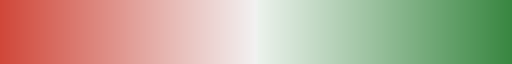

In [ ]:
cmap = sns.diverging_palette(15, 130, as_cmap=True)
cmap

## 7. Model Evaluation with Classification Report and Confusion Matrix

Beyond just accuracy, it's important to look at other metrics to understand the model's performance, especially for each individual class.
- **Classification Report:** Provides precision, recall, and F1-score for each class.
    - **Precision:** The ability of the classifier not to label as positive a sample that is negative.
    - **Recall:** The ability of the classifier to find all the positive samples.
    - **F1-score:** A weighted harmonic mean of precision and recall.
- **Confusion Matrix:** A table that summarizes the performance of a classification model. Each row represents the instances in an actual class, and each column represents the instances in a predicted class.

### 7.1 Model 1 Evaluation Results

We generate and display the classification report and confusion matrix for Model 1 to get a detailed breakdown of its performance across all classes.

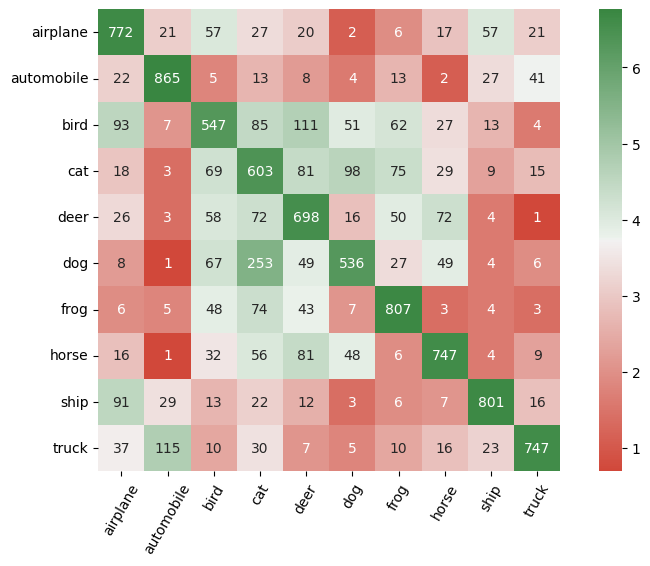

In [ ]:
cm = confusion_matrix(y_test_classes, y_pred)

plt.figure(figsize=(10, 6))
# sns.heatmap(cm, annot=True, fmt='d');

sns.heatmap(np.log1p(cm), annot=cm, cmap=cmap, fmt='d',
            xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

The results are not that good, improvement is required.

# MODELLING - 2

### 5.2  Model 2: A Modified CNN Architecture

We build a second CNN model with a different arrangement of layers and kernel sizes to explore if a different architecture yields better results.

In [ ]:
# Define the second Sequential model
model2 = Sequential()

# Add convolutional and pooling layers with different configurations
model2.add(Conv2D(64, kernel_size=(4, 4), input_shape=(x_train.shape[1:]), activation='relu', padding='same'))
model2.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.5))

# Flatten the output
model2.add(Flatten())

# Add dense layers
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=1e-3))
# Print a summary of the model's architecture
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,530 (1.23 MB)

 Trainable params: 323,530 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

#### Training Model 2

We train Model 2 using the same training and validation data as Model 1, with the same Early Stopping callback.

In [ ]:
fitData2 = model2.fit(x_train, y_train_one_hot, batch_size=64, epochs=15, validation_data=(x_test, y_test_one_hot),
                      callbacks=[early_stopping], verbose=True)
fitData2

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.2836 - loss: 1.8973 - val_accuracy: 0.5233 - val_loss: 1.3829
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5008 - loss: 1.3768 - val_accuracy: 0.5815 - val_loss: 1.2159
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5589 - loss: 1.2268 - val_accuracy: 0.6261 - val_loss: 1.1040
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5998 - loss: 1.1209 - val_accuracy: 0.6510 - val_loss: 1.0085
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6236 - loss: 1.0629 - val_accuracy: 0.6728 - val_loss: 0.9564
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6427 - loss: 1.0050 - val_accuracy: 0.6729 - val_loss: 0.9389
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6530 - loss: 0.9713 - val_accuracy: 0.6948 - val_loss: 0.8859
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6717 - loss: 0.9331 - val_acc

#### Evaluating Model 2

We evaluate Model 2 on the test dataset.

In [ ]:
# Evaluate Model 2 on the test data
loss2, accuracy2 = model2.evaluate(x_test, y_test_one_hot, verbose=0)
# Print the test loss and accuracy
print(f"Test Loss for Model 2: {loss2:.4f}")
print(f"Test Accuracy for Model 2: {accuracy2:.4f}")

Test Loss for Model 2: 0.7733
Test Accuracy for Model 2: 0.7380


### 6.2 Model 2 Training Metrics

These plots show how the loss and accuracy of Model 2 changed during training.

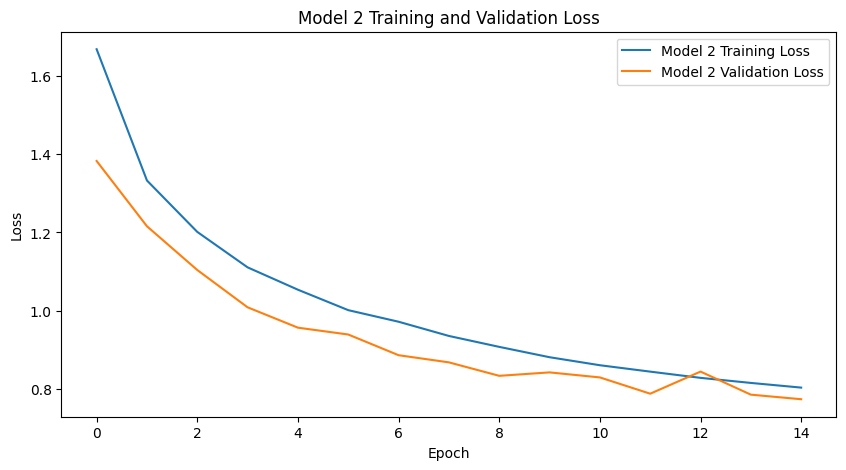

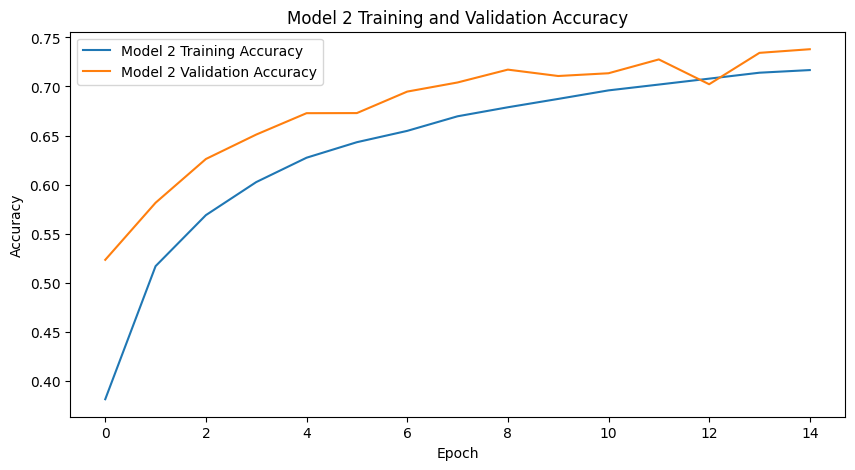

In [ ]:
# Plot training and validation loss for Model 2
plt.figure(figsize=(10, 5))
plt.plot(fitData2.history['loss'], label='Model 2 Training Loss')
plt.plot(fitData2.history['val_loss'], label='Model 2 Validation Loss')
plt.title('Model 2 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy for Model 2
plt.figure(figsize=(10, 5))
plt.plot(fitData2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(fitData2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.title('Model 2 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_preds2 = model2.predict(x_test)
y_preds2

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[3.35343345e-03, 8.40796903e-03, 7.24047143e-03, ...,
        1.01893097e-02, 7.00716209e-03, 4.34086565e-03],
       [3.70127126e-03, 4.45146114e-03, 5.36478274e-06, ...,
        3.90641219e-07, 9.90032315e-01, 1.78461068e-03],
       [1.18637875e-01, 7.89537653e-02, 3.25103737e-02, ...,
        1.05848480e-02, 6.34256899e-01, 5.07022962e-02],
       ...,
       [5.93766490e-05, 7.88438228e-06, 7.15227723e-02, ...,
        2.71244105e-02, 5.71154196e-05, 4.56691159e-05],
       [2.46129297e-02, 1.32178366e-01, 3.73481102e-02, ...,
        8.91749561e-03, 1.35803467e-03, 1.43115735e-02],
       [7.15329545e-04, 1.24261132e-04, 2.00306661e-02, ...,
        6.90916657e-01, 1.19612843e-04, 3.30810755e-04]], dtype=float32)

In [ ]:
y_pred2 = np.argmax(y_preds2, axis=1)
y_pred2

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
y_test_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
print(classification_report(y_test_classes, y_pred2, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.75      0.79      0.77      1000
  automobile       0.82      0.89      0.85      1000
        bird       0.73      0.55      0.63      1000
         cat       0.63      0.47      0.54      1000
        deer       0.62      0.78      0.69      1000
         dog       0.64      0.66      0.65      1000
        frog       0.73      0.83      0.78      1000
       horse       0.82      0.76      0.79      1000
        ship       0.80      0.87      0.83      1000
       truck       0.83      0.79      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000



* n this model our score is 73%, the best predictions are automobile and ship with 84%.

* The results are much better, however we could upgrade it.

### 7.2 Model 2 Evaluation Results

Generating and displaying the classification report and confusion matrix for Model 2.


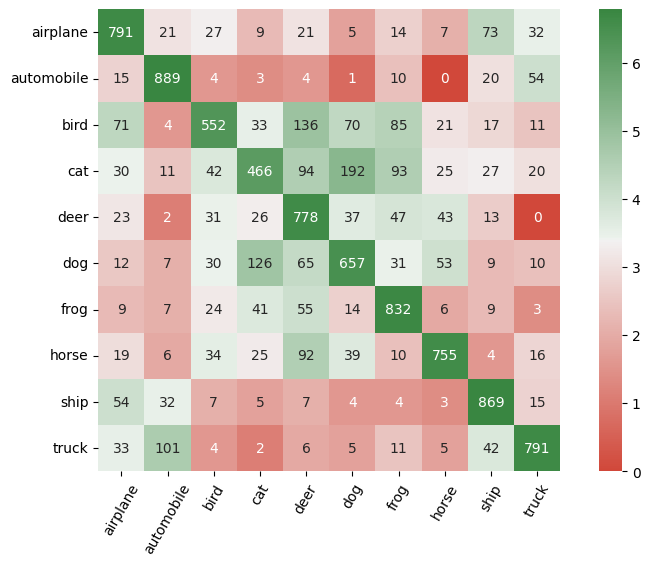

In [ ]:
cm2 = confusion_matrix(y_test_classes, y_pred2)

plt.figure(figsize=(10, 6))
# sns.heatmap(cm, annot=True, fmt='d');

sns.heatmap(np.log1p(cm2), annot=cm2, cmap=cmap, fmt='d',
            xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

# MODELLING - 3

### 5.3 Model 3: CNN with Batch Normalization

Our third model is a deeper CNN that incorporates Batch Normalization layers after each convolutional layer. Batch Normalization is a technique that normalizes the activations of a layer, which can help stabilize training and improve performance, especially in deeper networks.

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Define the third Sequential model
model3 = Sequential()

# Add convolutional, Batch Normalization, and pooling layers
model3.add(Conv2D(32, kernel_size=(4, 4), input_shape=(x_train.shape[1:]), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(128, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(256, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(256, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(512, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

# Flatten the output
model3.add(Flatten())

# Add dense layers
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate = 0.001))
# Print a summary of the model's architecture
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 8, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 4, 4, 256)      │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 4, 4, 512)      │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             

 Total params: 4,441,450 (16.94 MB)

 Trainable params: 4,438,570 (16.93 MB)

 Non-trainable params: 2,880 (11.25 KB)

#### Training Model 3

We train Model 3, which includes Batch Normalization, using the training and validation data and the Early Stopping callback.

In [81]:
fitData3 = model3.fit(x_train, y_train_one_hot, batch_size=64, epochs=15, validation_data=(x_test, y_test_one_hot),
                      callbacks=[early_stopping], verbose=True)
fitData3

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 44ms/step - accuracy: 0.4023 - loss: 1.6592 - val_accuracy: 0.5703 - val_loss: 1.2958
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 31ms/step - accuracy: 0.6919 - loss: 0.8820 - val_accuracy: 0.7031 - val_loss: 0.8536
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.7799 - loss: 0.6437 - val_accuracy: 0.6089 - val_loss: 1.2825
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8298 - loss: 0.5030 - val_accuracy: 0.7646 - val_loss: 0.7305
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.8662 - loss: 0.3910 - val_accuracy: 0.8113 - val_loss: 0.5840
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8967 - loss: 0.3052 - val_accuracy: 0.7882 - val_loss: 0.6953
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9293 - loss: 0.2079 - val_accuracy: 0.7883 - val_loss: 0.7370
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9409 - loss: 0.1728 - 

#### Evaluating Model 3

We evaluate Model 3 on the test dataset.

In [82]:
# Evaluate Model 3 on the test data
loss3, accuracy3 = model3.evaluate(x_test, y_test_one_hot, verbose=0)
# Print the test loss and accuracy
print(f"Test Loss for Model 3: {loss3:.4f}")
print(f"Test Accuracy for Model 3: {accuracy3:.4f}")

Test Loss for Model 3: 0.5840
Test Accuracy for Model 3: 0.8113


### 6.3 Model 3 Training Metrics

These plots show how the loss and accuracy of Model 3 changed during training.

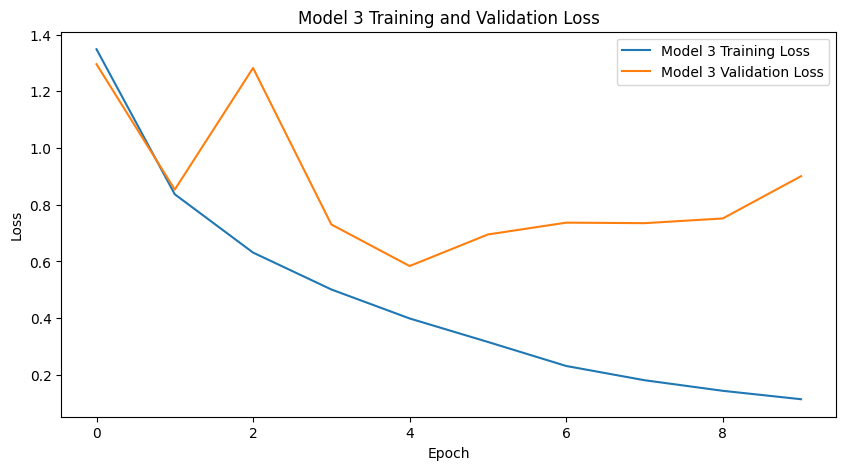

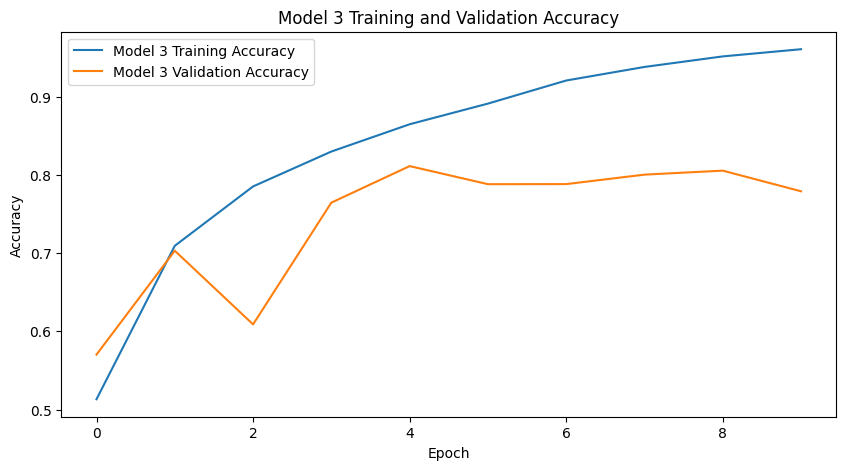

In [83]:
# Plot training and validation loss for Model 3
plt.figure(figsize=(10, 5))
plt.plot(fitData3.history['loss'], label='Model 3 Training Loss')
plt.plot(fitData3.history['val_loss'], label='Model 3 Validation Loss')
plt.title('Model 3 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy for Model 3
plt.figure(figsize=(10, 5))
plt.plot(fitData3.history['accuracy'], label='Model 3 Training Accuracy')
plt.plot(fitData3.history['val_accuracy'], label='Model 3 Validation Accuracy')
plt.title('Model 3 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
y_preds3 = model3.predict(x_test)
y_preds3

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[2.8164705e-04, 3.7174183e-03, 1.0809900e-02, ..., 3.1025689e-02,
        5.3517858e-04, 1.0822241e-02],
       [1.9248863e-04, 4.3998501e-05, 6.6985615e-07, ..., 4.4135587e-07,
        9.9971098e-01, 5.0760085e-05],
       [7.3143200e-04, 9.2843752e-03, 6.0528993e-05, ..., 4.3142722e-05,
        9.8828924e-01, 1.3473708e-03],
       ...,
       [3.2227822e-06, 8.0627740e-07, 6.9146133e-03, ..., 1.1585482e-03,
        3.5740065e-06, 1.3079463e-06],
       [2.7108429e-02, 6.4912266e-01, 1.1183021e-01, ..., 1.6212396e-03,
        6.3698590e-03, 2.1237753e-02],
       [1.4547658e-09, 1.7793236e-11, 4.1211486e-08, ..., 9.9986100e-01,
        3.1025533e-11, 1.3979871e-08]], dtype=float32)

In [86]:
y_pred3 = np.argmax(y_preds3, axis=1)
y_pred3

array([3, 8, 8, ..., 5, 1, 7])

In [87]:
y_test_classes = np.argmax(y_test_one_hot, axis=1)

In [88]:
print(classification_report(y_test_classes, y_pred3, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.89      0.73      0.80      1000
  automobile       0.92      0.88      0.90      1000
        bird       0.72      0.76      0.74      1000
         cat       0.78      0.53      0.63      1000
        deer       0.78      0.84      0.81      1000
         dog       0.75      0.77      0.76      1000
        frog       0.81      0.88      0.85      1000
       horse       0.75      0.91      0.83      1000
        ship       0.88      0.91      0.89      1000
       truck       0.86      0.90      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



* As we see above the results are quite good with 83% accuracy score.
* The best prediction is automobile with 93% precision score.
* The worst prediction is cat with 70% score.

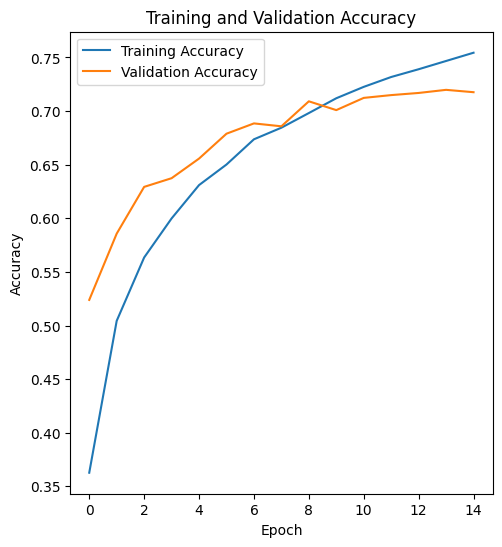

In [89]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

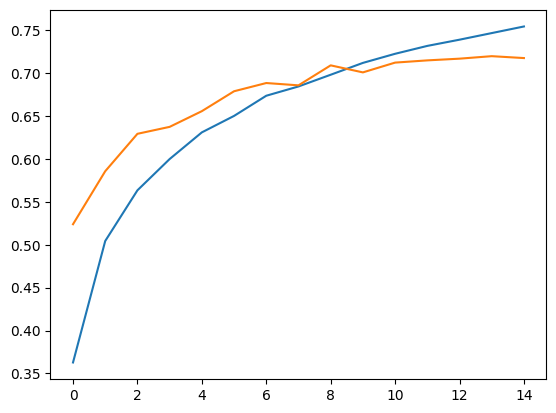

In [90]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc)
plt.plot(val_acc)
plt.show()

### 7.3 Model 3 Evaluation Results

Generating and displaying the classification report and confusion matrix for Model 3.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.77      0.74      1000
  automobile       0.82      0.86      0.84      1000
        bird       0.60      0.55      0.57      1000
         cat       0.49      0.60      0.54      1000
        deer       0.63      0.70      0.66      1000
         dog       0.70      0.54      0.61      1000
        frog       0.76      0.81      0.78      1000
       horse       0.77      0.75      0.76      1000
        ship       0.85      0.80      0.82      1000
       truck       0.87      0.75      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



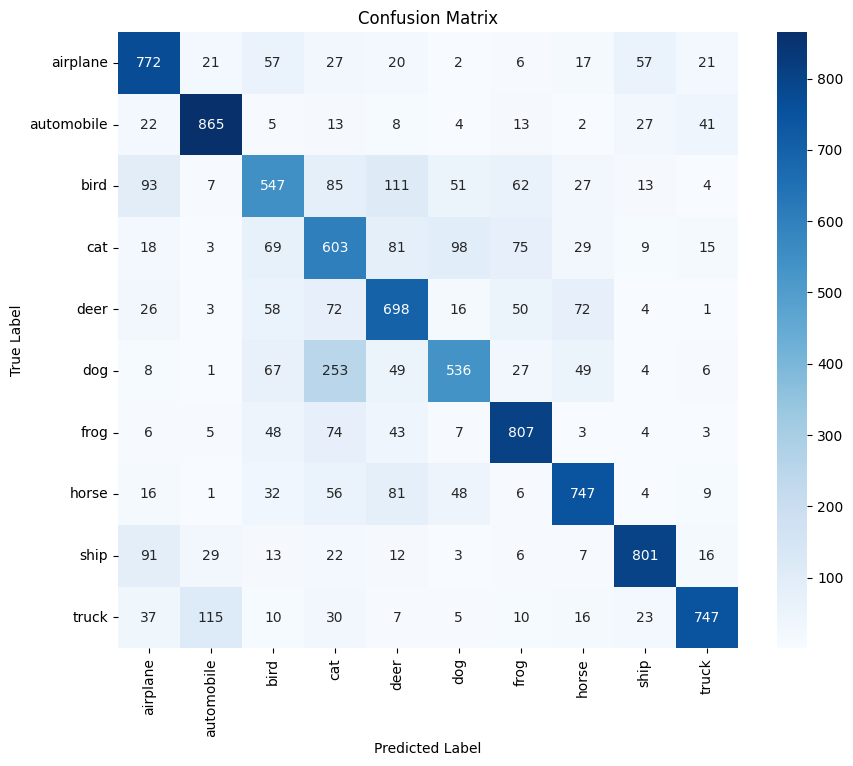

In [91]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels back to class indices
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Finish task

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

## 8. Visualizing Sample Predictions

To get a qualitative understanding of the model's performance, we visualize a few test images and show their true labels and the labels predicted by the best performing model (which based on the evaluation metrics appears to be Model 3).

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


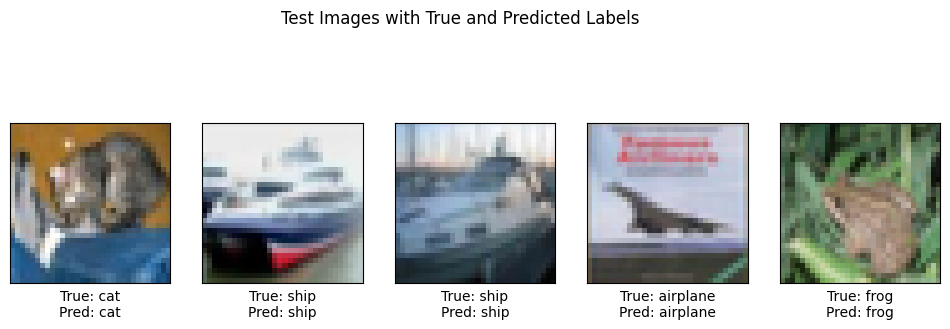

In [84]:
# Define the number of test images to display
num_test_images = 5
# Ensure y_test_classes is defined and accessible
test_images = x_test[:num_test_images]
true_labels = y_test_classes[:num_test_images]

# Get predictions from Model for the selected test images
predictions = model.predict(test_images)
# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Display the test images with their true and predicted labels
plt.figure(figsize=(12, 4))
for i in range(num_test_images):
    # Create a subplot for each image
    plt.subplot(1, num_test_images, i + 1)
    # Display the image
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_classes[i]]}")

# Add a main title to the figure
plt.suptitle('Test Images with True and Predicted Labels')
plt.show()

## Conclusion

Based on the evaluation metrics (accuracy, precision, recall, F1-score) and the confusion matrices, Model 3, which includes Batch Normalization layers, appears to be the best performing model among the three, achieving a test accuracy of approximately 80.15%. It shows improved performance across most classes compared to Model 1 and Model 2.

Summary of Model Performance:

Model 1 (Basic CNN): [Summarize key performance metrics like test accuracy, and observations from classification report/confusion matrix.].

Model 2 (Modified CNN): [Summarize key performance metrics and observations.].

Model 3 (CNN with Batch Normalization): [Summarize key performance metrics and observations. Highlight its performance relative to the other models.].

Further improvements could include:
- Hyperparameter tuning (e.g., learning rate, batch size, number of epochs, dropout rate)
- Data augmentation to increase the size and variability of the training data
- Using more complex CNN architectures (e.g., pre-trained models like ResNet or VGG)
- Implementing learning rate scheduling
- Using different optimizers